# 1D convolutions

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$ \mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.

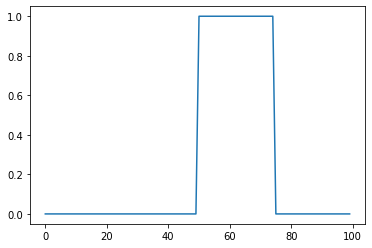

In [75]:
v = np.zeros(100)
v[50:75] = 1.0

plt.plot(v)

Consider the following kernels $\mathbf{k}$:

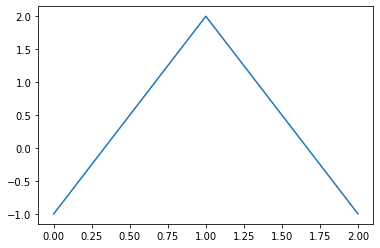

In [76]:
### first kernel
#k = np.ones(10)/10

### second kernel
#k = signal.gaussian(20, std=3)
#k = k / np.sum(k)

### third kernel
k = np.array([-1,2,-1])

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$

7.01e-04 s


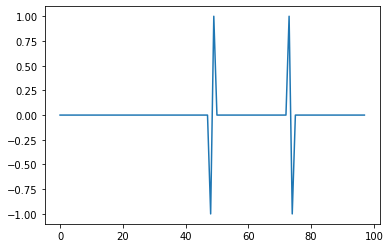

In [77]:
t0 = time.time()
k_padded = np.zeros(len(v))
k_padded[:len(k)] = np.flip(k)
K = linalg.toeplitz(k_padded, np.zeros(len(v) - len(k) + 1)).transpose()
v_conv_mat = K @ v

elapsed_time = time.time() - t0
print('%1.2e s' % elapsed_time)
plt.plot(v_conv_mat)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.

4.79e-04 s


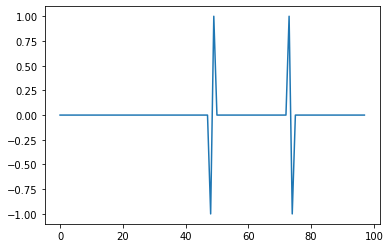

In [78]:
t0 = time.time()
l_out = len(v) - len(k) + 1
v_conv = np.zeros(l_out) 
for i in range(l_out):
  for j in range(len(k)):
    v_conv[i] += v[i+j]*k[-j-1]

elapsed_time = time.time() - t0
print('%1.2e s' % elapsed_time)
plt.plot(v_conv)

2.31e-03 s


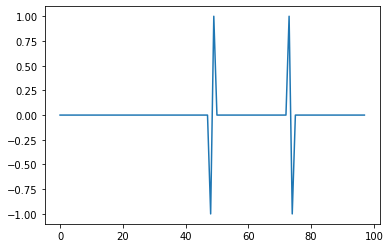

In [79]:
t0 = time.time()
l_out = len(v) - len(k) + 1
v_conv2 = np.array([np.sum(v[i:i+len(k)] * np.flip(k)) for i in range(l_out)])

elapsed_time = time.time() - t0
print('%1.2e s' % elapsed_time)
plt.plot(v_conv)

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:
- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


1.18e-03 s


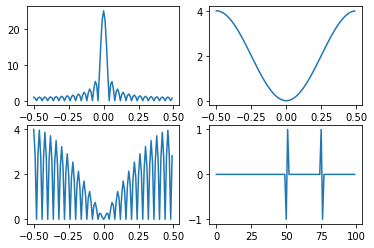

In [80]:
from numpy.fft import fft, ifft, fftshift, fftfreq

t0 = time.time()
v_fft = fft(v)
k_fft = fft(k, len(v))

vk_fft = v_fft * k_fft
v_conv = np.real(ifft(vk_fft))

elapsed_time = time.time() - t0
print('%1.2e s' % elapsed_time)
#plt.plot(v_conv)

freq = fftfreq(len(v))

fig, axs = plt.subplots(2,2)

axs[0,0].plot(fftshift(freq), fftshift(np.absolute(v_fft)))
axs[0,1].plot(fftshift(freq), fftshift(np.absolute(k_fft)))
axs[1,0].plot(fftshift(freq), fftshift(np.absolute(vk_fft)))
axs[1,1].plot(v_conv)


## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

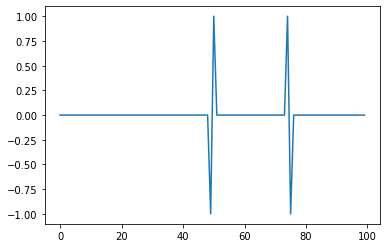

In [81]:
v_conv = signal.convolve(v,k, mode = "same")
plt.plot(v_conv)